# Machine Learning Model (Principle Component Analysis)

In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\Dell\\Machine Learning Model'

In [3]:
os.chdir('C:\\Users\\Dell')

In [4]:
os.getcwd()

'C:\\Users\\Dell'

In [5]:
import numpy as np
import pandas as pd

In [6]:
cc=pd.read_csv("CC_General.csv")                         #Credit Card Dataset
cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
cc=cc.drop(columns=["CUST_ID"])                            #Remove Unwanted Columns
cc.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Step 1

In [8]:
X=cc

In [9]:
X.head()                                                  #Feature Variables

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [10]:
#Unsupervised Learning Model don't have Target Variable

# Rules

In [11]:
X.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [12]:
type(X)

pandas.core.frame.DataFrame

In [13]:
X.shape

(8950, 17)

In [15]:
X.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [16]:
X.fillna(method="ffill",inplace=True)

In [17]:
X.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Step 2

# Feature scaling

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
SS=StandardScaler()

In [20]:
X_scaled=SS.fit_transform(X)

In [22]:
X_scaled                                         #Array

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3053336 ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08714014,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10010994,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32935392,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34057185,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.32688396,
        -0.52555097, -4.12276757]])

# Normalization

In [23]:
from sklearn.preprocessing import normalize

In [24]:
X_normalized=normalize(X_scaled)

In [26]:
X_normalized                                           #Array

array([[-0.31203754, -0.10633067, -0.18112923, ..., -0.13015974,
        -0.22403554,  0.153753  ],
       [ 0.21992844,  0.03753912, -0.13122357, ...,  0.02435267,
         0.06545835,  0.1007975 ],
       [ 0.1266835 ,  0.14678487, -0.03050485, ..., -0.02836341,
        -0.14890049,  0.10218868],
       ...,
       [-0.15698874, -0.03932717, -0.08522984, ..., -0.06983386,
         0.06980122, -0.8741623 ],
       [-0.15433414, -0.03841436, -0.09724958, ..., -0.07053634,
         0.0681811 , -0.85387249],
       [-0.11521665, -0.17889603,  0.00848081, ..., -0.06577735,
        -0.1057542 , -0.82960552]])

In [27]:
X_data=pd.DataFrame(X_normalized)

In [28]:
X_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.312038,-0.106331,-0.181129,-0.152156,-0.148808,-0.198985,-0.343796,-0.289304,-0.301518,-0.287892,-0.202942,-0.217975,-0.409413,-0.225497,-0.130160,-0.224036,0.153753
1,0.219928,0.037539,-0.131224,-0.099751,-0.127038,0.728177,-0.341439,-0.189662,-0.256269,0.160403,0.030762,-0.165387,0.192455,0.228782,0.024353,0.065458,0.100798
2,0.126684,0.146785,-0.030505,0.030851,-0.128792,-0.132251,0.359775,0.757449,-0.259805,-0.191342,-0.134881,-0.030888,0.234046,-0.108741,-0.028363,-0.148900,0.102189
3,0.020571,-0.426063,0.097223,0.228832,-0.190449,-0.154451,-0.424878,-0.167299,-0.384185,-0.108474,-0.138062,-0.231084,0.346093,-0.250827,-0.041942,-0.220185,0.151110
4,-0.151630,0.218959,-0.195282,-0.146778,-0.192118,-0.197278,-0.428601,-0.168765,-0.387551,-0.285424,-0.201202,-0.233109,-0.382671,-0.153993,-0.110323,-0.222114,0.152435


# Step 3

# Principal Component Analysis (PCA)

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca=PCA()

In [31]:
X1_data=pca.fit_transform(X_data)

In [32]:
X1_data                                 #Since this is in the form of array, we need to convert it to a DataFrame

array([[-4.89949135e-01, -6.79976192e-01, -9.61127776e-02, ...,
         2.68733816e-02, -2.90743198e-02, -6.38498375e-05],
       [-5.19098903e-01,  5.44827010e-01,  1.95171316e-01, ...,
        -1.52154669e-01,  1.39437357e-02,  6.41424357e-05],
       [ 3.30633222e-01,  2.68879366e-01,  1.20071782e-01, ...,
         2.14901763e-02, -8.76370379e-02, -2.85038798e-05],
       ...,
       [ 1.88817631e-01, -2.48155268e-01,  1.02016437e-01, ...,
         4.46409928e-02, -2.81676889e-02, -4.44559713e-05],
       [-3.13093012e-01, -1.71111637e-01,  2.32078054e-01, ...,
         1.52587713e-02,  2.23096349e-02, -4.11850526e-05],
       [ 1.28408810e-02,  9.84226648e-02,  3.43866421e-01, ...,
        -8.66742356e-02, -7.02329978e-02, -9.49805110e-05]])

In [33]:
X_pca=pd.DataFrame(X1_data)

In [34]:
X_pca.head()                                          #Main DataFrame(PCA)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.489949,-0.679976,-0.096113,0.117184,-0.003728,-0.049327,-0.109315,0.082748,0.060330,0.011190,0.059985,0.003466,0.025746,0.000377,0.026873,-0.029074,-0.000064
1,-0.519099,0.544827,0.195171,-0.204054,-0.265750,0.194318,0.030151,0.084667,-0.028670,0.460078,0.233696,-0.021468,0.113018,0.015088,-0.152155,0.013944,0.000064
2,0.330633,0.268879,0.120072,0.745725,0.130928,-0.097762,0.053001,-0.365170,-0.231719,0.070469,0.055219,0.103989,-0.124993,-0.131018,0.021490,-0.087637,-0.000029
3,-0.481656,-0.097611,0.456930,0.287131,-0.392945,-0.258155,-0.043547,-0.048495,0.081002,-0.250702,-0.114043,-0.181191,0.219746,-0.114830,-0.057326,0.007030,-0.000021
4,-0.563512,-0.482506,-0.253768,0.325008,0.027698,0.085402,0.045598,0.135228,0.024128,0.057543,0.053529,0.000693,-0.036238,0.025663,0.051324,0.018974,-0.000019


In [37]:
pca.explained_variance_ratio_[:2].sum()                            #To calculate perfect value of k(n_components)

0.47425402782208403

In [38]:
#In Reality, you need to take 9 columns not 2 columns.

In [39]:
X_final=X_pca.iloc[:,:2]

In [40]:
X_final.head()

,0,1
0,-0.489949,-0.679976
1,-0.519099,0.544827
2,0.330633,0.268879
3,-0.481656,-0.097611
4,-0.563512,-0.482506


In [42]:
X_final.columns=["PC1","PC2"]                                        #Renaming a Column Name

In [43]:
X_final.head()

,PC1,PC2
0,-0.489949,-0.679976
1,-0.519099,0.544827
2,0.330633,0.268879
3,-0.481656,-0.097611
4,-0.563512,-0.482506


In [44]:
X_final.shape

(8950, 2)

# Hierarchical Clustering (Agglomerative Clustering)

In [45]:
from sklearn.cluster import AgglomerativeClustering

In [46]:
ac2=AgglomerativeClustering(n_clusters=2)

In [47]:
ac2.fit_predict(X_final)

array([0, 0, 1, ..., 1, 0, 0], dtype=int32)

In [48]:
#It takes sample as rows and it predict whether it belongs to Cluster1 (0) or Cluster2 (1)

In [49]:
len(ac2.fit_predict(X_final))

8950

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

# For Cluster=2

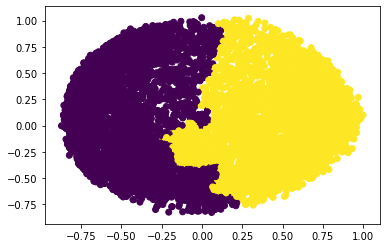

In [51]:
plt.scatter(X_final["PC1"],X_final["PC2"],c=ac2.fit_predict(X_final))       #c=color based on cluster
plt.show()                                                                  #Since we had 2 clusters, we will get 2 colors

# For Cluster=3

In [52]:
ac3=AgglomerativeClustering(n_clusters=3)

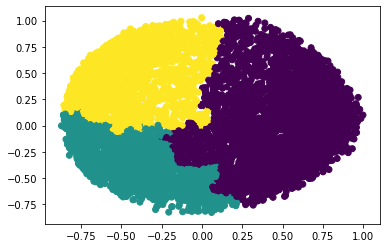

In [53]:
plt.scatter(X_final["PC1"],X_final["PC2"],c=ac3.fit_predict(X_final))       #c=color based on cluster
plt.show()                                                                  #Since we had 3 clusters, we will get 3 colors

# For Cluster=4

In [54]:
ac4=AgglomerativeClustering(n_clusters=4)

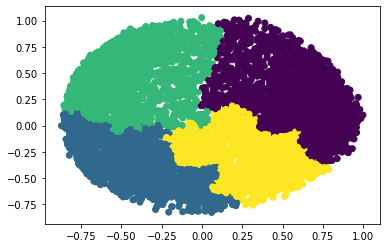

In [55]:
plt.scatter(X_final["PC1"],X_final["PC2"],c=ac4.fit_predict(X_final))       #c=color based on cluster
plt.show()                                                                  #Since we had 4 clusters, we will get 4 colors

# For Cluster=5

In [56]:
ac5=AgglomerativeClustering(n_clusters=5)

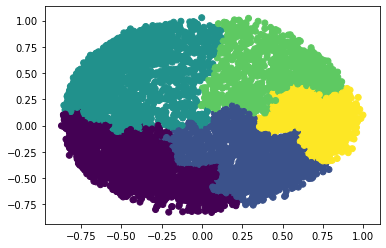

In [57]:
plt.scatter(X_final["PC1"],X_final["PC2"],c=ac5.fit_predict(X_final))       #c=color based on cluster
plt.show()                                                                  #Since we had 5 clusters, we will get 5 colors

# For Cluster=6

In [58]:
ac6=AgglomerativeClustering(n_clusters=6)

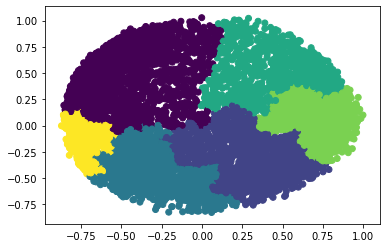

In [59]:
plt.scatter(X_final["PC1"],X_final["PC2"],c=ac6.fit_predict(X_final))       #c=color based on cluster
plt.show()                                                                  #Since we had 6 clusters, we will get 6 colors

# To check the correct value of n_clusters in KMeans, we use a Elbow Plot

# To check the correct value of n_clusters in Hierarchical Clustering, we use a Function called as silhouette_score

In [60]:
ks=[2,3,4,5,6]

In [61]:
silhouette_scores=[]

In [62]:
from sklearn.metrics import silhouette_score                            # Ranges from 0-1

In [63]:
silhouette_scores.append(silhouette_score(X_final,ac2.fit_predict(X_final)))

In [64]:
silhouette_scores.append(silhouette_score(X_final,ac3.fit_predict(X_final)))

In [65]:
silhouette_scores.append(silhouette_score(X_final,ac4.fit_predict(X_final)))

In [66]:
silhouette_scores.append(silhouette_score(X_final,ac5.fit_predict(X_final)))

In [67]:
silhouette_scores.append(silhouette_score(X_final,ac6.fit_predict(X_final)))

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

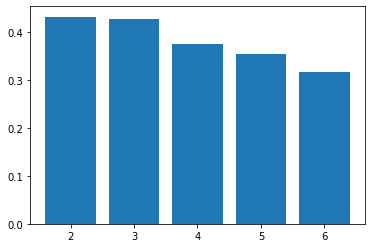

In [69]:
plt.bar(ks,silhouette_scores)
plt.show()

# TSNE

In [70]:
from sklearn.manifold import TSNE

In [71]:
tsne=TSNE(n_components=2)                        #Need to convert 17 columns into 2 columns

In [72]:
X_new=tsne.fit_transform(X_data)                 #It will appear in an array

In [74]:
X_tsne=pd.DataFrame(X_new)                       #Convert it to DataFrame

In [75]:
X_tsne                                           #Best 2 Columns with maximum variation are Printed

,0,1
0,-72.229805,40.818798
1,52.273361,8.100690
2,22.028530,-24.513391
3,-60.674091,39.428360
4,-4.990691,12.170035
...,...,...
8945,-29.863577,17.944309
8946,-24.367550,22.786491
8947,-28.635435,21.224409
8948,-15.689102,52.572277
